# Introduction to Coordinates and Time
The concept of coordinates and time is hopefully not alien (get it?) to you; however, astronomy being the precise field that it is, there are several time and coordinate systems in use, with slight variations between them, which may be important depending on your type of study (if you are studying the timing of the pulses of a pulsar for example, vs. the proper motion of stars in the sky)

As we approach the end of the planned series of tutorials, we once again state our main goal: to make you self-sufficient in using Python. Keeping that in mind, we have put in significantly less material than previous tutorials, since we expect you to keep referring to the AstroPy documentation. (also note, AstroPy has several functions and classes, which reflect the many uses that astronomers find for different quantities. So it is practically impossible to cover all of that in one tutorial). So this will only get you started in your AstroPy quest; find out more about the equations and coordinate and time systems used here, and their implementations in AstroPy.!

## Time

To begin with let us look at Time. Before you get started on this section, please go through the following webpages to get acquainted with the terms we will use in today's tutorial: [this](http://www.astronomy.ohio-state.edu/~pogge/Ast350/timesys.html), then [this](http://spiff.rit.edu/classes/phys301/lectures/time/time.html)

In [1]:
import numpy as np
from astropy.time import Time

You can easily access the time formats available. See also : [AstroPy Documentation](https://docs.astropy.org/en/stable/time/#time-format). 
These are essentially just the various ways in which we can write the date and time. 

For example, let us use the date and time 11:27:07 PM on 15th September 2018.

We would write this in 'iso' as 2018-09-15 23:27:07 <br>
'isot' just replaces the space between the date and time with a 'T': 2018-09-15T23:27:07 <br>
However, the dates are also dependent on the type of calendar used. If you use the Julian calendar, or the Gregorian calendar makes a difference in your date representations. This problem is compounded if say, there was a period in time when several countries shifted to the Gregorian calendar, while others were yet to do so. 

mjd, and jd are more convenient representations, as these are literally counting the days since some specified date. Julian Days are the number of days (can be fractional to account for time) since noon, Jan 1, 4713 BC (note that this date is as per what you would get if you extended the Julian calendar backwards, and not the Gregorian calendar in use today). Due to its large size, see below, a modified version called Modified Julian Days (yes, very creative) is used where the reference is Midnight Nov 17, 1858. Because MJD is defined from midnight, the integer part changes at noon (in UTC, see below for scales), which makes it convenient for astronomers.  


In [2]:
Time.FORMATS

OrderedDict([('jd', astropy.time.formats.TimeJD),
             ('mjd', astropy.time.formats.TimeMJD),
             ('decimalyear', astropy.time.formats.TimeDecimalYear),
             ('unix', astropy.time.formats.TimeUnix),
             ('cxcsec', astropy.time.formats.TimeCxcSec),
             ('gps', astropy.time.formats.TimeGPS),
             ('plot_date', astropy.time.formats.TimePlotDate),
             ('stardate', astropy.time.formats.TimeStardate),
             ('datetime', astropy.time.formats.TimeDatetime),
             ('ymdhms', astropy.time.formats.TimeYMDHMS),
             ('iso', astropy.time.formats.TimeISO),
             ('isot', astropy.time.formats.TimeISOT),
             ('yday', astropy.time.formats.TimeYearDayTime),
             ('datetime64', astropy.time.formats.TimeDatetime64),
             ('fits', astropy.time.formats.TimeFITS),
             ('byear', astropy.time.formats.TimeBesselianEpoch),
             ('jyear', astropy.time.formats.TimeJulianEpoch),
       

In [3]:
# If the format is clear, then you don't have to specify it
example_time = Time("2018-09-15 23:27:07")

In [4]:
print(f"ISO: {example_time}")
print(f"ISOT: {example_time.isot}")
print(f"Julian Day (JD): {example_time.jd}")
print(f"MJD: {example_time.mjd}")

ISO: 2018-09-15 23:27:07.000
ISOT: 2018-09-15T23:27:07.000
Julian Day (JD): 2458377.477164352
MJD: 58376.977164351854


We can easily find the time between two given date-times. 

In [5]:
time1 = Time("2018-09-15 23:27:07", scale='utc')
time2 = Time("2020-01-17 18:04:23", scale='utc')

In [6]:
delta_time = time2-time1
delta_time

<TimeDelta object: scale='tai' format='jd' value=488.7758796296296>

In [7]:
print(f"Time elapsed in seconds is {delta_time.sec}")
print(f"Time elapsed in days is {delta_time.jd}")
print(f"Time elapsed is {delta_time.datetime}")

Time elapsed in seconds is 42230236.0
Time elapsed in days is 488.7758796296296
Time elapsed is 488 days, 18:37:16


Now, we move on to something you might have noticed in the TimeDelta object: scale. 

Scale is essentially telling us how time passes. We know the value of a second to high precision, however the effects of the Earth's rotation mean that there are leap seconds between the actual time measured with the atomic clock (this is called International Atomic Time (or 'tai')) and the time taking the rotation into account (UTC, and other local times). 

This is reflected the `scale` argument. The [AstroPy Documentation](https://docs.astropy.org/en/stable/time/#time-scale) gives more details.

In [8]:
Time.SCALES

('tai', 'tcb', 'tcg', 'tdb', 'tt', 'ut1', 'utc', 'local')

We will use UTC for now. However, time differences are always measured in a time scale which does not have Earth's rotation messing it up. 

In [7]:
time_array = np.array([time1, time2])

In [8]:
print(time_array)

[<Time object: scale='utc' format='iso' value=2018-09-15 23:27:07.000>
 <Time object: scale='utc' format='iso' value=2020-01-17 18:04:23.000>]


In [9]:
# Time comparisons are supported
time_array.max()

<Time object: scale='utc' format='iso' value=2020-01-17 18:04:23.000>

There are many more functionalities of the `time` module, but for general use, this should suffice. Moving on to the other 3 indices, i.e. Coordinates

## Coordinates
3 coordinates are required to specify position. If we use a spherical coordinate system, these will be the distance to the point (or object), and two other angles (similar to the co-latitude and longitude used on Earth, for example). In an equivalent Cartesian System, we only need to know the direction of Z-axis and X-axis and the coordinate system is specified (this correponds to latitude of 90° and longitude of 0° respectively). Then we can play around with angles all we want. 

We will not consider distance for 3 reasons: Distance measurements deserve another (maybe two) tutorial, it is difficult and it is not necessary to observe the sky.

Before we start, just as earlier, please have a look at this [link](https://dept.astro.lsa.umich.edu/resources/ugactivities/Labs/coords/) for some insight into these coordinate systems before proceeding. 

### Horizontal Coordinates
This is the natural coordinate system we would think of while observing the sky. The Z-axis is directly overhead, and X-axis points to the North. However by convention, the "longitude" called Azimuth is measured N-E-S-W-N. The other coordinate ("latitude") is called Altitude and is quite literally the altitude of the object (as an angle)

### Equatorial Coordinates
This is essentially the coordinate system we want to use while stating the position of the object as it accounts for Earth's rotation. Here, the Z-axis is the Earth's North Pole (rotation axis), and X-axis is defined as the point of intersection of the Earth's Equator and its orbital plane (called the Ecliptic). 

The "longitude" called Right Ascension (RA) is directly correlated with time, so it is usually written in HMS (if not decimal degrees). "Latitude" is called Declination. (to convert from decimal degrees to hours, divide by 15, i.e. 360 degrees is equal to 24 hours)

There are problems however; the Earth's rotation axis changes direction gradually. This leads to a need for specifying when the coordinate system has to be defined. For most modern observations, this is called J2000.

In [98]:
import astropy.units as u
from astropy.coordinates import EarthLocation, SkyCoord, get_sun, AltAz 
import matplotlib.pyplot as plt

We can define a coordinate as required: (for a more complete list, check out... you guessed it, the [AstroPy Documentation](https://docs.astropy.org/en/stable/coordinates/#getting-started))

In [83]:
coordinate1 = SkyCoord(ra = '12h34m10s', dec = '+19d10m29s')
coordinate2 = SkyCoord(ra = 245.88, dec = -19.24, unit='deg')
coordinate3 = SkyCoord(ra = 182.3*u.deg, dec = 54.89*u.deg)

An earlier tutorial (on Functions) asked you to calculate the distance between galaxies. This would have made it significantly easier to do so. 

In [84]:
# Separation in angles between coordinates. 
coordinate1.separation(coordinate2)

<Angle 68.0971875 deg>

You can also get the coordinates of an astronomical object using its name

In [85]:
whirlpool_coordinates = SkyCoord.from_name("M51")

A slightly more complicated example here would be converting between the Equatorial and Horizontal systems; note that this is an example in the AstroPy Documentation. You are encouraged to look it up in preparation for...

### Your Assignment...
...should you choose to accept it, will be the following:
1. Make a scatter plot of the position of the Sun in Horizontal Coordinates throughout the year. You may use the Ephemeris of the Sun from this [link](http://astropixels.com/ephemeris/sun/sun2019.html) (Geocentric Ephemeris for the Sun, Moon and Planets Courtesy of Fred Espenak, www.Astropixels.com). <br>
The resulting plot is called an Analemma. Change up the position on Earth (latitude) and do the same calculation. How does changing latitude change the Analemma?
2. Choose an object (any that you want) and plot its altitude throughout the night (local night; you will have to add 5 hours 30 minutes to UTC). 

Use the following coordinates for calculation in part 2:
Indian Astronomical Observatory (Hanle, Ladakh)
Coordinates: 32.7908° N, 79.0002° E
Height above Sea Level: 4500 m

You can use this opportunity to see if a target you like can be observed from Hanle, which is where the GROWTH-India Telescope is set up. If your target is above 30 degrees in altitude for a significant time period (at least an hour or so), then it is likely we can observe it.

You can submit your proposals [here](https://docs.google.com/forms/d/1JEFMmV4YSLcARtiSe_KrZaS8PiNKp7ThSJ9kDZsTqGw/edit) for any targets you want to observe!

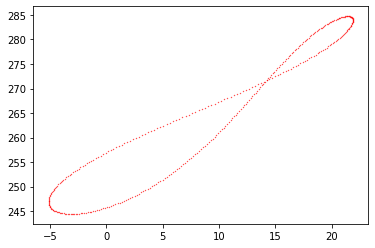

In [101]:
observing_time = Time('2019-01-01 12:00')
delta_hours = np.linspace(0, 365, 366)*u.d
time_data = observing_time + delta_hours

location = EarthLocation(lat=32.7908*u.deg, lon=79.0002*u.deg, height=4.5*u.km)    
sun_data = get_sun(time_data).transform_to(AltAz(location=location))


plt.scatter(sun_data.alt,sun_data.az,s=0.1,c='r')
plt.show()